In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

Sample Data Generation

Text(0.5, 1.0, 'Observations')

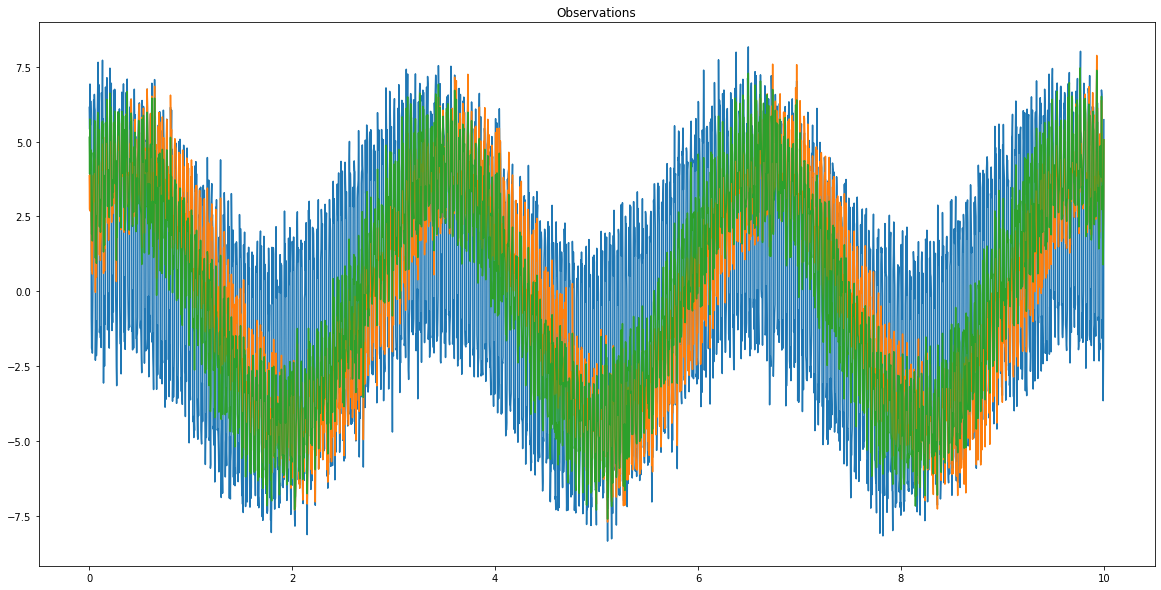

In [3]:
t = np.linspace(0, 10, 3000)
s1 = np.sin(2 * t)
s2 = np.cos(2 * t)
s3 = signal.square(50 * np.pi * t)

#random noise
def stand_rand(*x):
    x = np.array(x)
    x -= x.mean()
    x /= x.std()
    x += 0.2 * np.random.normal(size=x.shape)
    return x

s1, s2, s3 = stand_rand(s1, s2, s3)

#mixing matrix
signals = np.c_[s1, s2, s3]
mixing = np.array([[1,2,3], [3,2,1], [2,3,1]])
obs = np.dot(signals, mixing.T)

plt.figure(figsize=(20,10))
plt.plot(t, obs)
plt.title('Observations')

ICA

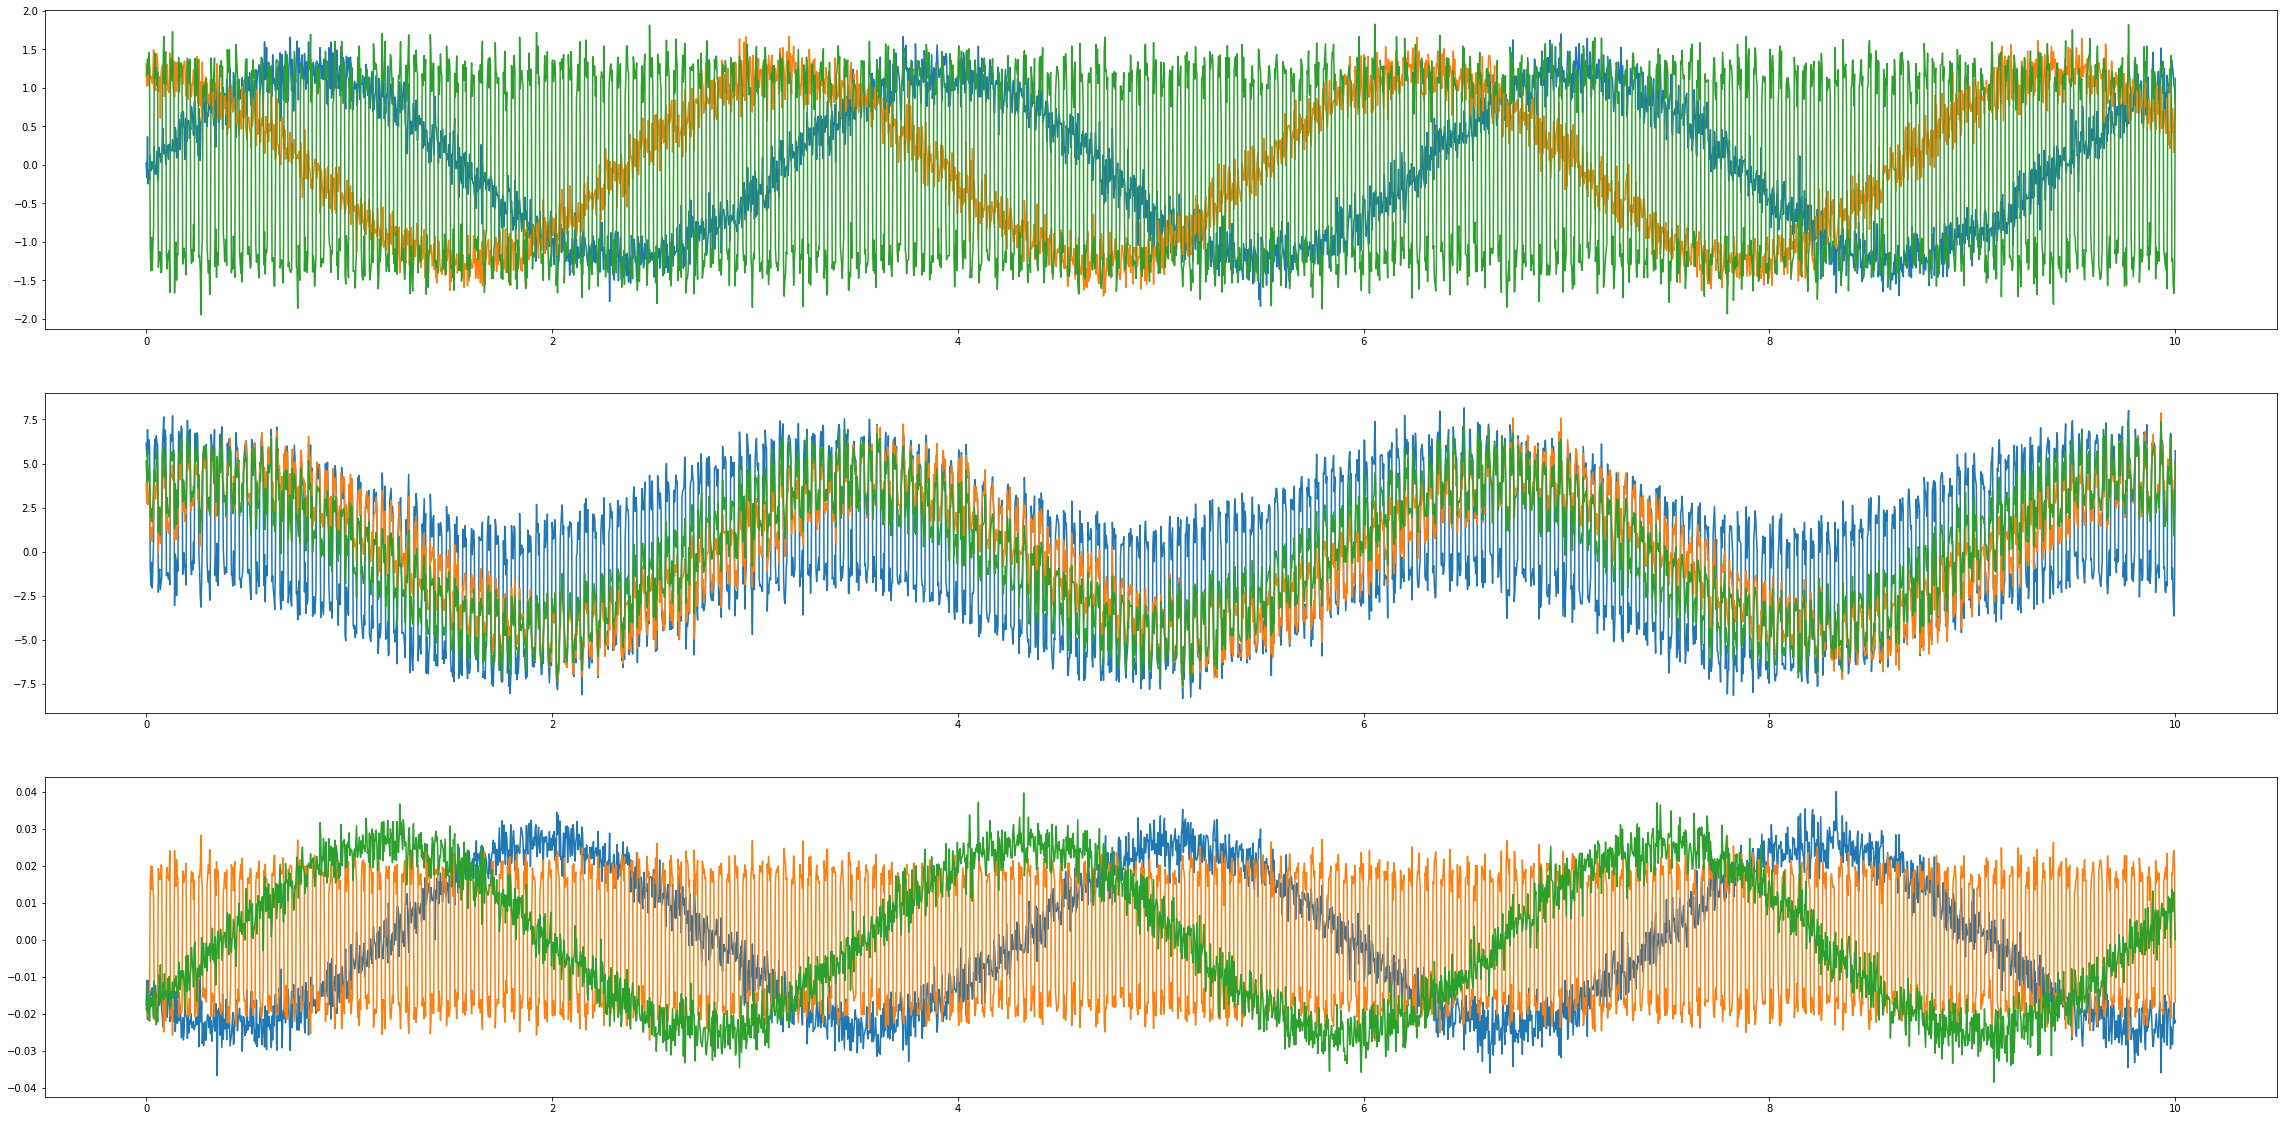

In [4]:
ica = FastICA(n_components=3)
signals_retrieved = ica.fit_transform(obs)

fig, axs = plt.subplots(3,figsize=(40,20))
axs[0].plot(t, signals)
axs[1].plot(t, obs)
axs[2].plot(t, signals_retrieved)